# Valve List Cleaner
***
### Exporting Raw Data
This valve cleaning script works for raw Hand-Valve data exported from Plant. To export, navigate in data manager to the Hand Valves node under Engineering Items > Inline Assets (blue circle). Then ensure the drop down at the top left says "P&ID Project Data" not "Current Drawing Data"(blue circle). This will ensure data for the entire project is exported. Finally, click the "Export" button next to the printer(green circle). 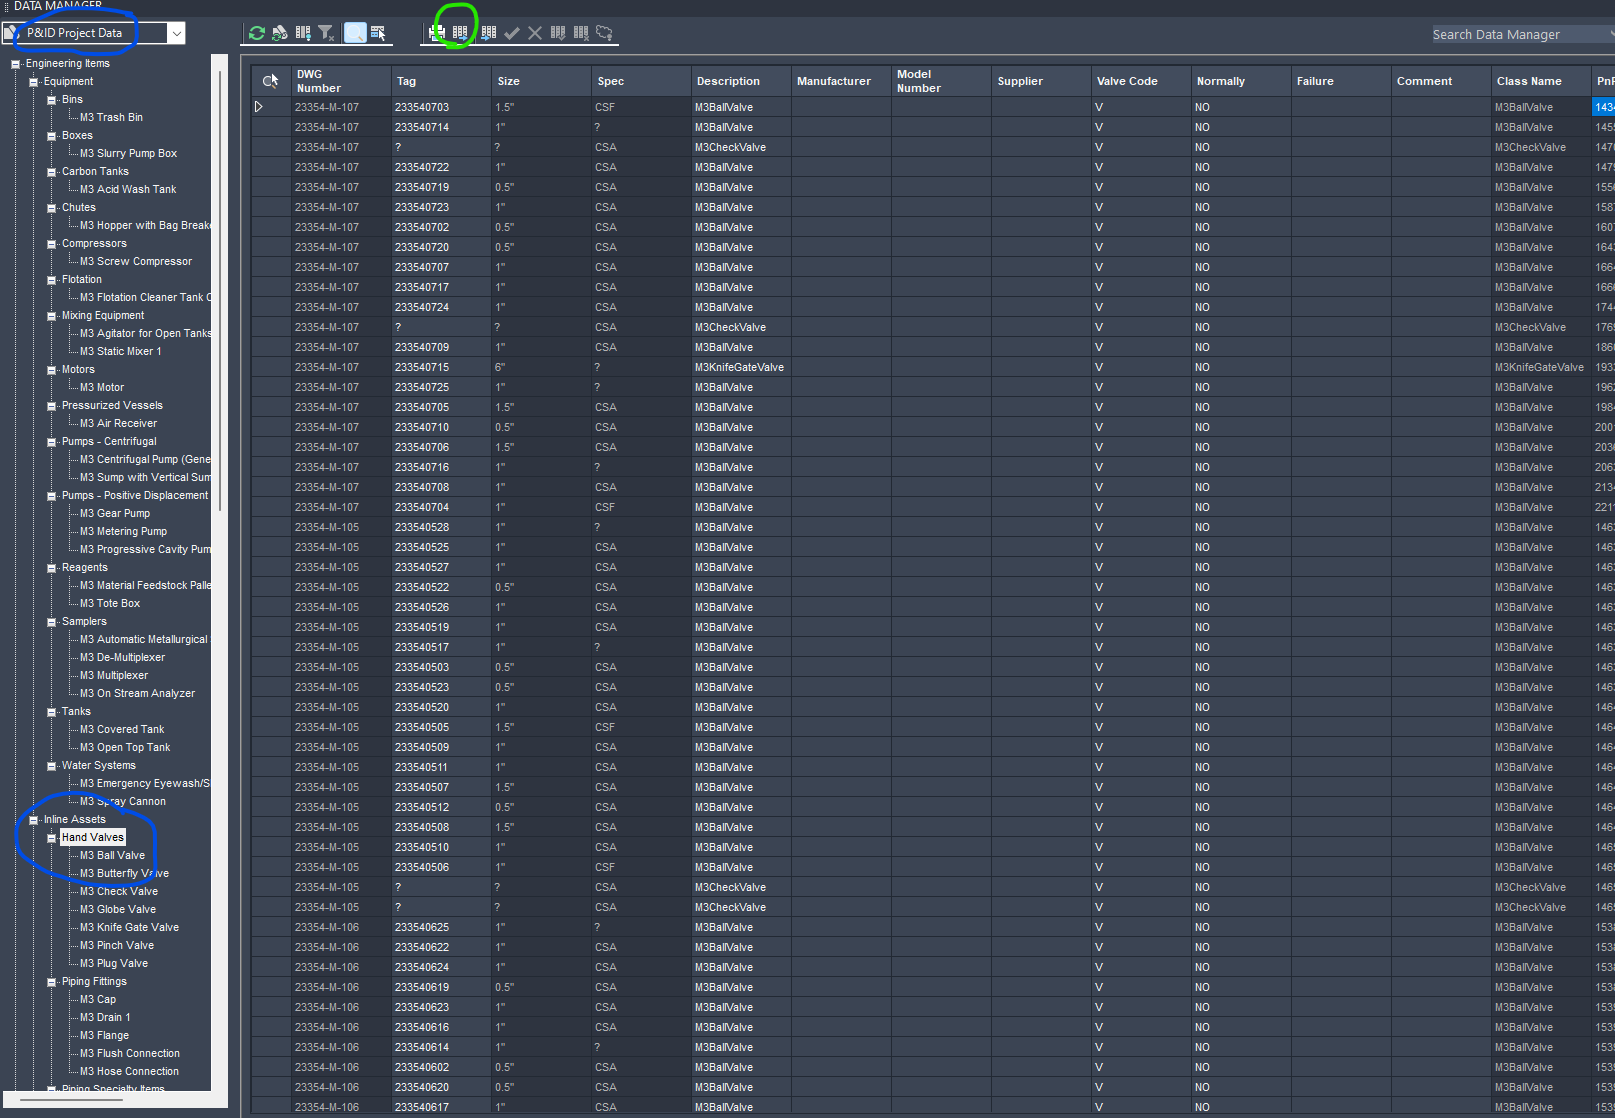<br><br><br>

After clicking "Export", a new dialogue window will appear. Select "Active node only" and place the file wherever. 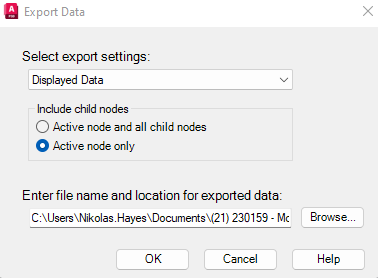 <br><br><br>

### Instructions for Use
1. Copy the file path. It should look something like C:\Users\Firstname.Lastname\Desktop\ ...<br><br>
2. Paste the file path between the two apostrophes below. It should then look like r'C:\Users\Firstname.Lastname\Desktop\ ...'<br><br>
3. Provide the digits in the area code. For example, if the project has two area, 3300 and 3400, then the area_digits variable should be 4.<br><br>
4. Provide a new file name between the two apostrophes. For example, if the output file should be name 240087 Valves Cleaned, then make the new_file_name variable say '240087 Valves Cleaned' <br><br>
5. Click 'run'. If there are any errors, contact Nik or Michael. If the script runs fine, then the new file will be stored in whatever folder this script is stored. For example, if you have this script stored on your desktop, the output file will appear there.

In [34]:
file_path = r'C:\Users\Nikolas.Hayes\Desktop\Scripts\Valves\(21) 230159 - Moly Plant Quanity Improvements (Rework)-Hand Valves.xlsx'
area_digits = 4
new_file_name = 'ya mama'

The below cell will define our dictionaries. <br><br>
symbol_specs describes the allowed specs based on what the valve symbol is called (BA-01 is allowed for M3BallValve, but GL-04 is not) <br><br>
pipe_specs describes the allowed pipe material and size for a given valve spec (CSC pipe can only have GA-05A, GA-05B, PI-01, and PL-02, and each can only be in a certain size range)


In [35]:
#imports
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

#load excel
df = pd.read_excel(file_path)

#Define dictionaries
symbol_specs = {
    "M3BallValve" : ['BA-01', 'BA-02', 'BA-03', 'BA-04', 'BA-05', 'BA-06', 'BA-07',
                     'BA-08', 'BA-09', 'BA-10', 'BA-20'],

    "M3ButterflyValve" : ['BU-01', 'BU-01L', 'BU-01F', 'BU-02', 'BU-02L', 'BU-02F',
                          'BU-04L', 'BU-05L', 'BU-06', 'BU-06L', 'BU-08', 'BU-08L', 'BU-09'],

    "M3CheckValve" : ['CK-01', 'CK-02', 'CK-03', 'CK-04', 'CK-05', 'CK-06', 'CK-07', 'CK-08',
                      'CK-08', 'CK-09', 'CK-10', 'CK-11', 'CK-12', 'CK-13', 'CK-15', 'CK-16',
                      'CK-17', 'CK-19', 'CK-20', 'CK-21', 'CK-22', 'CK-23', 'CK-24', 'CK-25'],

    "M3DiaphragmValve" : ['DI-01', 'DI-02', 'DI-03', 'DI-04', 'DI-05'],   

    "M3GateValve" : ['GA-01', 'GA-02', 'GA-03', 'GA-04', 'GA-05A', 'GA-05B', 'GA-06', 'GA-07',
                     'GA-08', 'GA-09', 'GA-10', 'GA-11', 'GA-12', 'GA-13', 'GA-14', 'GA-15',
                     'GA-17', 'GA-19', 'GA-20', 'GA-21', 'GA-22', 'GA-23', 'GA-24', 'GA-25A', 'GA-25B'],

    "M3GlobeValve" : ['GL-01', 'GL-03', 'GL-04', 'GL-05', 'GL-06', 'GL-07', 'GL-08', 'GL-09',
                      'GL-11', 'GL-12', 'GL-13', 'GL-14', 'GL-15'],

    "M3NeedleValve" : ['NE-01'],

    "M3PinchValve" : ['PI-01', 'PI-03'],

    "M3PlugValve" : ['PL-01', 'PL-02', 'PL-03', 'PL-04', 'PL-05', 'PL-05G', 'PL-06', 'PL-07',
                     'PL-08', 'PL-10'],

    "M3KnifeGateValve" : ['GA-05A', 'GA-05B']
    }


pipe_specs = {

    "CAR" : {
        'GA-13' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'PL-02' : ['0.75"', '1"', '1.25"', '1.5"', '2"'],

        'PL-03' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"']
    },

    "CSA": {
        'BA-01': ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'BU-01': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"', '42"', '48"'],

        'BU-01L': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"', '42"', '48"'],
        
        'BU-01F': ['54"', '60"'],

        'CK-01': ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'CK-02': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"'],

        'GA-01': ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'GA-02': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"'],

        'GL-01': ['0.5"', '0.75"', '1"', '1.5"', '2"']
    },

    "CSB": {
        'CK-03' : ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'CK-04' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"'],

        'GA-03' : ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'GA-04' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"'],

        'GL-03' : ['0.5"', '0.75"', '1"', '1.5"', '2"'],

        'GL-04' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'PL-01' : ['0.5"', '0.75"', '1"', '1.5"', '2"', '2.5"', '3"', '4"'],
    },

    "CSC": {
        'GA-05A': ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"'],

        'GA-05B': ['22"', '24"', '30"', '32"', '36"', '42"', '46"'],

        'PI-01' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"'],

        'PL-02' : ['2"']
    },

    "CSD" : {
        'GA-05A' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                  '16"', '18"', '20"', '22"', '24"']
    },

    "CSE": {
        'CK-06' : ['0.5"', '1"', '2"', '2.5"', '3"', '4"', '6"'],

        'GL-05' : ['0.5"', '1"', '2"', '2.5"', '3"', '4"', '6"'],

        'PL-06' : ['0.5"', '1"', '2"', '2.5"', '3"', '4"', '6"']
    },

    "CSF": {
        'GA-13' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"', '14"',
                   '16"', '18"', '20"', '22"', '24"', '30"'],

        'PI-01' : ['1"', '1.25"', '1.5"', '2"', '2.5"', '3"', '4"', '6"', '8"', '10"'],

        'PL-02' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'PL-02' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"']
    },

    "CSG" : {
        'BA-01' : ['0.5"', '0.75"'],

        'BU-01' : ['1"', '1.25"', '1.5"', '2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"', '42"', '48"'],

        'BU-01L': ['1"', '1.25"', '1.5"', '2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"', '42"', '48"'],

        'CK-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-02' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', '32"', '36"'],

        'GA-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-02' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GL-01' : ['0.5"', '0.75"']
    },

    "CSH" : {
        'BA-07' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-16' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-03' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-17' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GA-12' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GL-09' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"']
    },

    "CSI": {
        'BA-07' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BU-02' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'CK-19' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-20' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GA-20' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-19' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GL-11' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']
    },

    "CSL" : {
        'CK-24' : ['3"', '4"', '6"'],

        'GA-08' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GA-09' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"']

    },
    
    "CSM": {
        'GA-05' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"' ],

        'PL-02' : ['2"'],

        'PL-03' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"']
    },

    "CSP" : {
        'BA-20' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-21' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-22' : ['2.5"', '3"'],

        'GL-12' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-13' : ['2.5"', '3"', '4"', '6"'],
    },

    "CSU" : {
        'GA-05A' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'PL-04' : ['2"', '2.5"'],

        'PL-05' : ['3"', '4"', '6"', '8"', '10"', '12"']
    },

    "CSX" : {
        'CK-16' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-23' : ['2.5"', '3"'],

        'GA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-12' : ['2.5"', '3"', '4"', '6"'],

        'GL-14' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-15' : ['2.5"', '3"', '4"', '6"'],

        'NE-01' : ['0.5"', '0.75"', '1"'],

        'PI-01' : ['2.5"', '3"', '4"', '6"']
    },

    "CUA" : {
        'BA-02' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-15' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"', '2.5"', '3"'],

        'GA-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"', '2.5"', '3"'],

        'GL-08' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']
    },

    "DIA" : {
        'GA-08' : ['4"', '6"', '8"', '10"', '12"'],

        'GA-09' : ['4"', '6"', '8"', '10"', '12"']

    },

    "FGA" : {
        'CK-11' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"'],

        'GA-15' : ['2"', '2.5"', '3"', '4"', '6"'],

        'GL-05' : ['2"', '2.5"', '3"', '4"', '6"'],

        'PL-07' : ['2"', '2.5"', '3"', '4"', '6"']
    },

    "GVA" : {
        'BA-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"',
                   '2.5"', '3"'],

        'BU-01' : ['2"', '2.5"', '3"', '4"'],

        'BU-01L': ['2"', '2.5"', '3"', '4"'],

        'CK-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"',
                   '2.5"', '3"'],

        'GA-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']

    },

    "PE7C" : {
        'BU-05L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'GA-24' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"'],

        'BU-08' : ['14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"'],

    },

    "PE7S" : {
        'GA-25A' : ['2"', '2.5"', '3"', '4"'],

        'GA-25B' : ['14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"']

    },

    "PE7W" : {
        'BU-05L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'GA-12' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"']

    },

    "PE9C" : {
        'BU-06L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"'],

        'GA-23' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"']

    },

    "PE9S" :{
        'GA-25A': ['2"', '2.5"', '3"', '4"', '14"', '16"', '18"',
                    '20"', '22"', '24"', '30"', 
                    '32"', '36"']

    },

    "PE9W" : {
        'BU-04L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"'],

        'GA-04' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"']

    },

    "PE11C" : {
        'BU-06L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"'],

        'GA-23' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"']

    },

    "PE11S" : {
        'GA-05A': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"'],

        'GA-13' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'GA-05A': ['14"', '16"', '18"', '20"'],

        'GA-05B': ['24"', '30"', '32"', '36"']

    },

    "PE11W": {
        'BU-02' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"'],

        'GA-04' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"']

    },

    "PE17C" : {
        'BU-06' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-06L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"', '54"'],

        'GA-23' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"', '54"']

    },

    "PE17S" : {
        'GA-05A': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"'],

        'GA-13' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"'],

        'GA-05B': ['24"', '30"', '32"', '36"', '42"', '48"', '54"']

    },

    "PE17W" : {
        'BU-02' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"', '54"'],

        'GA-04' : ['2"', '2.5"', '3"', '4"', '6"', '8"', '10"', '12"'
                   '14"', '16"', '18"', '20"', '22"', '24"']
    },

    "PEG11" : {
        'PL-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']

    },

    "PLA" : {
        'BA-03' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"', '2.5"',
                   '3"', '4"'],

        'BU-02' : ['3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['3"', '4"', '6"', '8"', '10"', '12"']
    },

    "PLB" : {
        'BA-04' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BA-05' : ['2.5"', '3"', '4"', '6"'],

        'CK-09' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"', '2.5"', '3"'],

        'DI-02' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'PL-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"', '2.5"', '3"', '4"', '6"'],
           },

    "PLE" : {
        'BA-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-01' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BU-01' : ['2.5"', '3"', '4"'],

        'BU-01L': ['2.5"', '3"', '4"'],

        'CK-02' : ['2.5"', '3"', '4"'],

        'GA-02' : ['2.5"', '3"', '4"']
    },

    "PLF" :{
        'BA-03' : ['2"'],

        'BU-02' : ['3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['3"', '4"', '6"', '8"', '10"', '12"'],

        'CK-19' : ['2"'],

        'CK-20' : ['3"', '4"', '6"', '8"', '10"', '12"'],

        'GA-20' : ['2"'],

        'GA-19' : ['3"', '4"', '6"', '8"', '10"', '12"'],

        'GL-11' : ['2"']

    },

    "PPL" : {
        'BU-03' : ['6"', '8"', '10"', '12"'],

        'CK-07' : ['1"', '1.25"', '1.5"', '2"', '2.5"',
                   '3"', '4"', '6"', '8"', '10"', '12"'],

        'PL-06' : ['1"', '1.25"', '1.5"', '2"', '2.5"',
                   '3"', '4"'],

        'DI-02' : ['2.5"', '3"', '4"', '6"']

    },

    "PTL" : {
        'BU-03' : ['6"', '8"', '10"', '12"'],

        'CK-07' : ['1"', '1.25"', '1.75"', '2"', '2.5"',
                   '3"', '4"', '6"', '8"', '10"', '12"'],

        'PL-06' : ['1"', '1.25"', '1.75"', '2"', '2.5"',
                   '3"', '4"'],

        'DI-02' : ['2.5"','3"', '4"', '6"']

    },

    "PVL" : {
        'BU-03' : ['1.5"', '2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'CK-14' : ['1"', '1.25"', '1.5"', '2"', '2.5"',
                    '3"', '4"', '6"', '8"', '10"', '12"'],

        'PL-09' : ['1"', '1.25"', '1.5"', '2"', '2.5"',
                    '3"', '4"'],

        'DI-06' : ['1"', '1.25"', '1.5"', '2"', '2.5"',
                    '3"', '4"', '6"']

    },

    "SCA" : {
        'GA-17' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"',
                   '2.5"', '3"', '4"', '6"', '8"'],

        'CK-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"',
                   '2.5"', '3"', '4"', '6"', '8"'],

        'PL-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"',
                   '2.5"', '3"', '4"', '6"', '8"']

    },

    "SSA" : {
        'BA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BA-08' : ['2.5"', '3"', '4"'],

        'BU-02' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'BU-02L': ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'CK-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"'],

        'CK-11' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"'],

        'GL-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']
    },

    "SSB" : {
        'BA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BU-06' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],
        
        'BU-06L': ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'CK-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-11' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"', '30"', 
                    '32"', '36"', '42"', '48"'],

        'NE-01' : ['0.5"', '0.75"', '1"']
    },

    "SSC" : {
        'BA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BU-08' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-08L': ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"'],

        'CK-12' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"'],

        'CK-13' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"',
                   '14"', '16"', '18"', '20"', '22"', '24"']
    },

    "SSE" : {
        'BA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'BU-02' : ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'BU-02L': ['2"','2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'CK-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-11' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'NE-01' : ['0.5"', '0.75"', '1"']
    },

    "SSP" : {
        'BA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-10' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"']
    },

    "SSX" : {
        'CK-16' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'CK-23' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'GA-06' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GA-22' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"'],

        'GL-14' : ['0.5"', '0.75"', '1"', '1.25"', '1.5"', '2"'],

        'GL-15' : ['2.5"', '3"', '4"', '6"', '8"', '10"', '12"']
    }

    
    }

The below cell defines the functions we will be using to verify valves. <br><br>
symbol_spec_valid uses the symbol_specs dictionary, and determines if the valve spec listed matches the symbol name. If the spec and symbol name match, it will return True. If they don't match, it will return False. <br><br>
pipe_spec_valid uses the pipe_spec dictionary and determines if the pipe material, size, and spec are all in alignment with the master 4601. It will return True if they are and False if they are not.

In [47]:
#Define functions
def symbol_spec_valid(valve_type, spec):
    if valve_type in symbol_specs:
        if spec in symbol_specs[valve_type]:
            return 'Okay'
        else:
            return 'Check'
    else:
        return False



def pipe_spec_valid(size, material, spec):
    if material in pipe_specs:
        if spec in pipe_specs[material]:
            if size in pipe_specs[material][spec]:
                return 'Okay'
            else:
                return 'Check'
        else:
            return 'Check'
    else:
        return 'Check'

The cell below will clean our raw data for usage later. <br><br>

First, the area codes for the valves are checked. Earlier we decided the amount of digits in the area code (i.e., 3 for area 355), and that is used now. This will create a new column called "Area" which can later on be filtered in Excel to quickly check that the area code is correct for a valve. For example, on RTK Moly (M3-PN230159), the area code was 23354. Several valves were incorrectly labeled various other numbers, such as 2354, 22354, and 4350. This snippet of code creates a new column to easily view and verify any mistakes such as these.<br><br>

Second, the Excel file is whittled way down. Only some columns are kept, including the new Area column, the drawing number column, the size, and others. All others are dropped. <br><br>

Third, a new column is made called "Service Desc. Verification". This column is meant to catch any issues there may be in the Service Description column. If the line number that the valve is on is something like ?-PRESSURE INDICATION-?-?-0.5"-?, the service description on the final valve list should simply read "PRESSURE INDICATION" rather than the full line tag. This column is meant to be easily copy/pasted if everything checks out, but if something is wrong it will throw a "CHECK SERVICE DESCRIPTION" which can be filtered later in Excel.

In [37]:
area_codes = {}

for index, tag in df['Tag'].items():
    area_code = tag[0:area_digits]
    area_codes[tag] = area_code


df['Area'] = df['Tag'].map(area_codes)

columns_to_keep = ['Size', 'Service Description', 'Valve Spec', 'Tag', 'DWG Number',
                    'Area', 'Spec', 'Description']

df = df[columns_to_keep]

def check_value(description):
    if isinstance(description, str):
        if 'PRESSURE INDICATION' in description:
            return 'PRESSURE INDICATION' 
        elif 'FLUSH CONN' in description:
            return 'FLUSH CONN.'
        elif 'SEAL WATER' in description:
            return 'SEAL WATER'
        elif 'FLUSH' in description:
            return 'FLUSH CONN.'
        elif 'DRAIN' in description:
            return 'DRAIN'
        elif 'INSTRUMENT' in description:
            return 'INSTRUMENT AIR'
        elif 'AIR' in description:
            return 'INSTRUMENT AIR'
        elif 'PIT' in description:
            return 'PRESSURE INDICATION'   
        elif '?' in description:
            return 'CHECK SERVICE DESCRIPTION'
        else:
            return description
    else: return description
    
df['Service Desc. Verification'] = df['Service Description'].apply(check_value)

The cell below calls our functions for valve verification (pipe_spec_valid and symbol_spec_valid). Two new columns will be created which can be filtered later in Excel. <br><br>

The first column stores the results of pipe_spec_valid. It is called Size/Material Verification. It stores True/False values and can be filtered by False to show any valves with issues.<br><br>

The second columns is labeled Symbol/Spec Verification. It also stores True/False values and can be filtered by False to show issues.

In [48]:
df['In Line with 4601?'] = df.apply(lambda row: pipe_spec_valid(row['Size'], row['Spec'], row['Valve Spec']), axis=1)

df['Symbol/Spec Verification'] = df.apply(lambda row: symbol_spec_valid(row['Description'], row['Valve Spec']), axis=1)

#Check for duplicates

duplicates = df['Tag'].duplicated(keep=False)

if not new_file_name.endswith('.xlsx'):
    new_file_name = new_file_name + '.xlsx'


df.to_excel(new_file_name, sheet_name='Sheet1', index=False)

wb = load_workbook(new_file_name)
ws = wb.active

highlight_fill = PatternFill(start_color="FFFF0000", end_color="FFFF0000", fill_type="solid")

duplicates = df['Tag'].duplicated(keep=False)

tag_column_idx = df.columns.get_loc('Tag') + 1
for idx, (tag_value, is_duplicate) in enumerate(zip(df['Tag'], duplicates), start=2):  # Start from row 2 to skip the header
    if is_duplicate or '?' in str(tag_value):  # Check if value is a duplicate or contains a '?'
        ws.cell(row=idx, column=tag_column_idx).fill = highlight_fill
    
wb.save(new_file_name)